In [1]:
#Directories for the training, validation, and test splits
train_dir = 'C:/Users/May Phu Paing/OneDrive - KMITL/Desktop/DeepPython/cats_and_dogs_small/train' 
validation_dir ='C:/Users/May Phu Paing/OneDrive - KMITL/Desktop/DeepPython/cats_and_dogs_small/validation'
test_dir = 'C:/Users/May Phu Paing/OneDrive - KMITL/Desktop/DeepPython/cats_and_dogs_small/test' 


# load the dataset 
from tensorflow.keras. preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # validation data shouldn’t be augmented! 

train_generator  = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator  = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
) 



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [2]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [3]:
# convnet for dog cat classification 

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.5)) # dropout layer is added
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [4]:
# compile the model 
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [5]:
# train the model
history  = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

C:\Users\May Phu Paing\anaconda3\envs\DL\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 50s 493ms/step - loss: 0.6937 - acc: 0.5225 - val_loss: 0.7129 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 51s 504ms/step - loss: 0.6880 - acc: 0.5475 - val_loss: 0.6786 - val_acc: 0.5610
Epoch 3/30
100/100 [==============================] - 53s 526ms/step - loss: 0.6816 - acc: 0.5660 - val_loss: 0.6587 - val_acc: 0.6000
Epoch 4/30
100/100 [==============================] - 99s 998ms/step - loss: 0.6678 - acc: 0.5835 - val_loss: 0.6757 - val_acc: 0.5630
Epoch 5/30
100/100 [==============================] - 101s 997ms/step - loss: 0.6603 - acc: 0.6085 - val_loss: 0.6641 - val_acc: 0.5750
Epoch 6/30
100/100 [==============================] - 78s 776ms/step - loss: 0.6535 - acc: 0.6135 - val_loss: 0.6576 - val_acc: 0.5840
Epoch 7/30
100/100 [==============================] - 78s 779ms/step - loss: 0.6483 - acc: 0.6155 - val_loss: 0.6404 - val_acc: 0.6060
Epoch 8/30
100/100 [==============================] - 

In [6]:
#save the trained model
model.save('cats_and_dogs_small_2.h5')

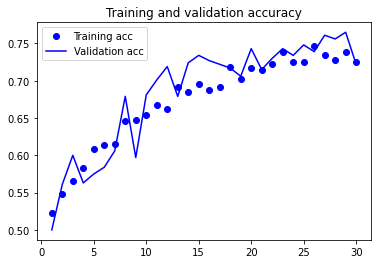

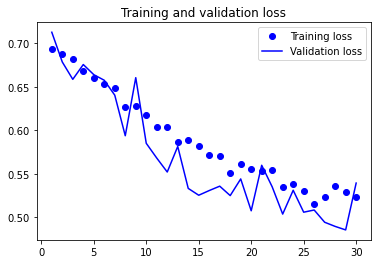

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()